In [3]:
import pandas as pd
import pandas as pd

# 数据加载
train = pd.read_csv('./train.csv')
train

In [ ]:
test = pd.read_csv('./test.csv')
test

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
0,22501,35,technician,single,professional.course,no,yes,yes,cellular,aug,...,3295,1,476,0,success,1.4,95.37,-33.04,3.63,5204.54
1,22502,26,admin.,single,high.school,no,yes,no,cellular,may,...,2872,1,166,2,success,-1.8,91.75,-44.42,3.16,4924.78
2,22503,44,blue-collar,married,basic.6y,no,no,no,telephone,may,...,268,3,968,0,nonexistent,1.1,89.67,-36.90,5.04,4947.02
3,22504,36,blue-collar,married,basic.9y,no,yes,no,telephone,nov,...,30,1,432,5,success,-0.1,89.87,-41.66,3.27,5203.33
4,22505,41,blue-collar,married,basic.4y,no,yes,no,telephone,may,...,1670,1,944,3,success,1.1,97.64,-36.32,3.95,4992.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,29996,49,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,...,3937,50,302,1,failure,-1.8,95.77,-40.50,3.86,5058.64
7496,29997,34,blue-collar,married,basic.4y,no,no,no,cellular,jul,...,584,8,440,3,failure,1.4,90.59,-47.29,1.77,5156.70
7497,29998,50,retired,single,basic.4y,no,yes,no,cellular,jun,...,102,3,997,0,nonexistent,-2.9,97.42,-39.69,1.29,5116.80
7498,29999,31,technician,married,professional.course,no,no,no,cellular,aug,...,179,3,1028,0,nonexistent,1.4,96.90,-37.68,5.18,5144.45


In [ ]:
submission = pd.read_csv('./submission.csv')
submission

,id,subscribe
0,22501,no
1,22502,no
2,22503,no
3,22504,no
4,22505,no
...,...,...
7495,29996,no
7496,29997,no
7497,29998,no
7498,29999,no


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import lightgbm as lgb
import lightgbm as lgb

In [5]:
train
#训练集有标签【subscribe】，22 columns

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,no
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,yes
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,22496,33,admin.,married,high.school,no,no,no,cellular,aug,...,3,925,3,failure,-2.9,92.47,-43.30,3.36,5203.22,yes
22496,22497,34,admin.,divorced,high.school,no,unknown,unknown,cellular,aug,...,14,533,3,failure,1.4,93.64,-26.27,4.41,4914.80,no
22497,22498,25,admin.,married,professional.course,no,yes,no,cellular,may,...,0,792,5,success,-1.8,90.43,-36.75,4.05,5114.30,no
22498,22499,57,retired,married,high.school,no,yes,no,telephone,may,...,5,989,0,nonexistent,1.1,89.38,-37.96,4.95,5284.43,no


In [15]:
test
#测试集没有标签，21columns

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
0,22501,35,technician,single,professional.course,no,yes,yes,cellular,aug,...,3295,1,476,0,success,1.4,95.37,-33.04,3.63,5204.54
1,22502,26,admin.,single,high.school,no,yes,no,cellular,may,...,2872,1,166,2,success,-1.8,91.75,-44.42,3.16,4924.78
2,22503,44,blue-collar,married,basic.6y,no,no,no,telephone,may,...,268,3,968,0,nonexistent,1.1,89.67,-36.90,5.04,4947.02
3,22504,36,blue-collar,married,basic.9y,no,yes,no,telephone,nov,...,30,1,432,5,success,-0.1,89.87,-41.66,3.27,5203.33
4,22505,41,blue-collar,married,basic.4y,no,yes,no,telephone,may,...,1670,1,944,3,success,1.1,97.64,-36.32,3.95,4992.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,29996,49,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,...,3937,50,302,1,failure,-1.8,95.77,-40.50,3.86,5058.64
7496,29997,34,blue-collar,married,basic.4y,no,no,no,cellular,jul,...,584,8,440,3,failure,1.4,90.59,-47.29,1.77,5156.70
7497,29998,50,retired,single,basic.4y,no,yes,no,cellular,jun,...,102,3,997,0,nonexistent,-2.9,97.42,-39.69,1.29,5116.80
7498,29999,31,technician,married,professional.course,no,no,no,cellular,aug,...,179,3,1028,0,nonexistent,1.4,96.90,-37.68,5.18,5144.45


In [8]:
test = pd.read_csv('./test.csv')
test

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
0,22501,35,technician,single,professional.course,no,yes,yes,cellular,aug,...,3295,1,476,0,success,1.4,95.37,-33.04,3.63,5204.54
1,22502,26,admin.,single,high.school,no,yes,no,cellular,may,...,2872,1,166,2,success,-1.8,91.75,-44.42,3.16,4924.78
2,22503,44,blue-collar,married,basic.6y,no,no,no,telephone,may,...,268,3,968,0,nonexistent,1.1,89.67,-36.90,5.04,4947.02
3,22504,36,blue-collar,married,basic.9y,no,yes,no,telephone,nov,...,30,1,432,5,success,-0.1,89.87,-41.66,3.27,5203.33
4,22505,41,blue-collar,married,basic.4y,no,yes,no,telephone,may,...,1670,1,944,3,success,1.1,97.64,-36.32,3.95,4992.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,29996,49,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,...,3937,50,302,1,failure,-1.8,95.77,-40.50,3.86,5058.64
7496,29997,34,blue-collar,married,basic.4y,no,no,no,cellular,jul,...,584,8,440,3,failure,1.4,90.59,-47.29,1.77,5156.70
7497,29998,50,retired,single,basic.4y,no,yes,no,cellular,jun,...,102,3,997,0,nonexistent,-2.9,97.42,-39.69,1.29,5116.80
7498,29999,31,technician,married,professional.course,no,no,no,cellular,aug,...,179,3,1028,0,nonexistent,1.4,96.90,-37.68,5.18,5144.45


In [10]:
cat_columns.remove("subscribe")
#把标签那一列去掉 的非数值特征
d

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,no
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,yes
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,29996,49,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,...,50,302,1,failure,-1.8,95.77,-40.50,3.86,5058.64,NaN
7496,29997,34,blue-collar,married,basic.4y,no,no,no,cellular,jul,...,8,440,3,failure,1.4,90.59,-47.29,1.77,5156.70,NaN
7497,29998,50,retired,single,basic.4y,no,yes,no,cellular,jun,...,3,997,0,nonexistent,-2.9,97.42,-39.69,1.29,5116.80,NaN
7498,29999,31,technician,married,professional.course,no,no,no,cellular,aug,...,3,1028,0,nonexistent,1.4,96.90,-37.68,5.18,5144.45,NaN


In [11]:
d.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7490, 7491, 7492, 7493, 7494, 7495, 7496, 7497, 7498, 7499],
           dtype='int64', length=30000)

In [13]:
d.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_index',
       'cons_conf_index', 'lending_rate3m', 'nr_employed', 'subscribe'],
      dtype='object')

In [14]:
#筛选出非数值特征
d.select_dtypes(include='O').columns
cat_columns = d.select_dtypes(include='O').columns
cat_columns = list(cat_columns)
cat_columns.remove("subscribe")
#把标签那一列去掉 的非数值特征

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'subscribe'],
      dtype='object')

In [18]:
cat_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [19]:
for c in cat_columns:
    le = LabelEncoder()
    d[c] = le.fit_transform(d[c])
subscribe2int = {"no":0,"yes":1}
d['subscribe'] = d['subscribe'].apply(lambda x:subscribe2int.get(x,x))

In [20]:
le1=LabelEncoder()
data=le1.fit_transform(d['marital'])


In [21]:
le1=LabelEncoder()
data=le1.fit_transform(d['marital'])
#根据编码后的类别，反向推导出编码前对应的原始标签
print(data.inverse_transform([0,1,2]))

[0 1 0 ... 2 1 0]


In [35]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import lightgbm as lgb

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
d = pd.concat([train,test])

cat_columns = d.select_dtypes(include='O').columns
cat_columns = list(cat_columns)
cat_columns.remove("subscribe")
for c in cat_columns:
    le = LabelEncoder()
    d[c] = le.fit_transform(d[c])
subscribe2int = {"no":0,"yes":1}
d['subscribe'] = d['subscribe'].apply(lambda x:subscribe2int.get(x,x))

In [36]:
train = d[~d['subscribe'].isnull()]
test = d[d['subscribe'].isnull()]
features = list(train.columns)
features.remove("id")
features.remove("subscribe")
y = train['subscribe'].values.astype(int)
train = train[features].values
test = test[features].values

In [38]:
kfold = KFold(n_splits = 5,shuffle = True,random_state = 2023)
for trn_idx,val_idx in kfold.split(train):
    trn,y_trn = train[trn_idx],y[trn_idx]
    val,y_val = train[val_idx],y[val_idx]
    break

In [39]:
def model_lgb(trn,y_trn):
    model = lgb.LGBMClassifier(
            objective='binary',
            max_depth=-1, learning_rate=0.005, min_child_samples=3, random_state=2023,
            n_estimators=5000, subsample=1, colsample_bytree=1,silent = False
    )
    model.fit(trn,y_trn)
    return model

In [40]:
model = model_lgb(trn,y_trn)
preds = model.predict(val)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val,preds))
print(preds.sum())

C:\Users\14816\AppData\Roaming\Python\Python310\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 2385, number of negative: 15615
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1733
[LightGBM] [Info] Number of data points in the train set: 18000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.132500 -> initscore=-1.879033
[LightGBM] [Info] Start training from score -1.879033
0.8826666666666667
339


[22:27:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

Accuracy: 96.67 % 


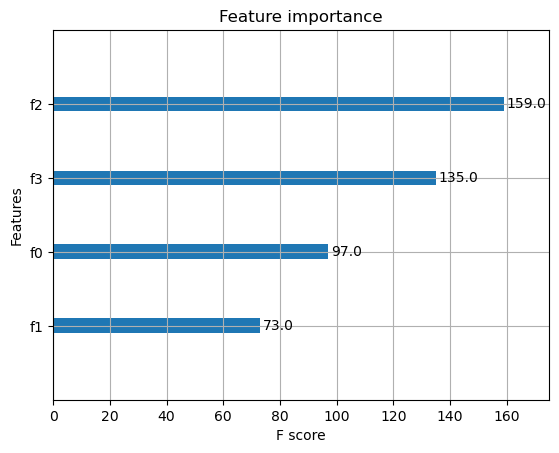

In [46]:
#xgboost 分类
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# read in the iris data
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234565)

params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

plst = list(params.items())


dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)

# 计算准确率
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# 显示重要特征
plot_importance(model)
plt.show()

In [63]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family='Microsoft YaHei')  #将显示图片时的语言设置成为了 Microsoft YaHei，使图片能显示中文


# 导入数据集
df = pd.read_csv("diabetes.csv")
data=df.iloc[:,:8]
target=df.iloc[:,-1]
 
# 切分训练集和测试集
train_x, test_x, train_y, test_y = train_test_split(data,target,test_size=0.2,random_state=7)  #设置百分之20的测试集，百分之80的训练集，随机性数值设为7

# xgboost模型初始化设置
dtrain=xgb.DMatrix(train_x,label=train_y)  #对训练集x进行训练，标签为trainy
dtest=xgb.DMatrix(test_x)  #设置测试集testx
watchlist = [(dtrain,'train')]


In [72]:
# booster:
params={'booster':'gbtree',
        'objective': 'binary:logistic',
        'eval_metric': 'auc',  #以auc为评价指标
        'max_depth':7,  #树的最大深度
        'lambda':10,
        'subsample':0.75,
        'colsample_bytree':0.75,
        'min_child_weight':2,
        'eta': 0.025,
        'seed':0,
        'nthread':8,
        'gamma':0.15,
        'learning_rate' : 0.01}  #学习率设为0.01

# 建模与预测：50棵树
bst=xgb.train(params,dtrain,num_boost_round=50,evals=watchlist)
ypred=bst.predict(dtest)
 
# 设置阈值、评价指标
y_pred = (ypred >= 0.5)*1
print ('Precesion: %.4f' %metrics.precision_score(test_y,y_pred))
print ('Recall: %.4f' % metrics.recall_score(test_y,y_pred))
print ('F1-score: %.4f' %metrics.f1_score(test_y,y_pred))
print ('Accuracy: %.4f' % metrics.accuracy_score(test_y,y_pred))
print ('AUC: %.4f' % metrics.roc_auc_score(test_y,ypred))

[0]	train-auc:0.80611
[1]	train-auc:0.82055
[2]	train-auc:0.82210
[3]	train-auc:0.82131
[4]	train-auc:0.84759
[5]	train-auc:0.84244
[6]	train-auc:0.84575
[7]	train-auc:0.84687
[8]	train-auc:0.85490
[9]	train-auc:0.86088
[10]	train-auc:0.86125
[11]	train-auc:0.86139
[12]	train-auc:0.86475
[13]	train-auc:0.87026
[14]	train-auc:0.87183
[15]	train-auc:0.87477
[16]	train-auc:0.87704
[17]	train-auc:0.87871
[18]	train-auc:0.88220
[19]	train-auc:0.88078
[20]	train-auc:0.88197
[21]	train-auc:0.88336
[22]	train-auc:0.88467
[23]	train-auc:0.88491
[24]	train-auc:0.88598
[25]	train-auc:0.88502
[26]	train-auc:0.88400
[27]	train-auc:0.88389
[28]	train-auc:0.88409
[29]	train-auc:0.88304
[30]	train-auc:0.88368
[31]	train-auc:0.88638
[32]	train-auc:0.88639
[33]	train-auc:0.88697
[34]	train-auc:0.88613
[35]	train-auc:0.88590
[36]	train-auc:0.88738
[37]	train-auc:0.88758
[38]	train-auc:0.88830
[39]	train-auc:0.88840
[40]	train-auc:0.88775
[41]	train-auc:0.88840
[42]	train-auc:0.88910
[43]	train-auc:0.8887

测试集每个样本的得分
 [0.36599383 0.5873137  0.46178928 0.38093525 0.4507811  0.4853487
 0.3741663  0.41591492 0.558106   0.38363296 0.57740253 0.38116252
 0.5147923  0.566334   0.4394421  0.41375983 0.40818807 0.4250188
 0.42294618 0.42518917 0.49231958 0.39773035 0.549357   0.53918993
 0.37721604 0.39586896 0.3732312  0.5233003  0.4672936  0.40761226
 0.45750248 0.42272985 0.43031168 0.48937353 0.3679134  0.46905392
 0.47254014 0.40362343 0.57044375 0.47276393 0.5133957  0.53876317
 0.4911707  0.36441782 0.39163277 0.4209519  0.47606656 0.50813764
 0.42909226 0.50073224 0.37782934 0.3671714  0.46996036 0.43335217
 0.5545075  0.47747993 0.4057495  0.37443173 0.45409393 0.4383558
 0.41838032 0.52616906 0.4100661  0.5149957  0.51005065 0.5268385
 0.4182936  0.50702965 0.5835858  0.49755853 0.5758854  0.54664767
 0.39622924 0.44027153 0.4318706  0.4127833  0.41197553 0.41607732
 0.36614355 0.42342567 0.41770944 0.42504275 0.4176759  0.3750422
 0.43358532 0.47447658 0.5808787  0.42439833 0.49822852

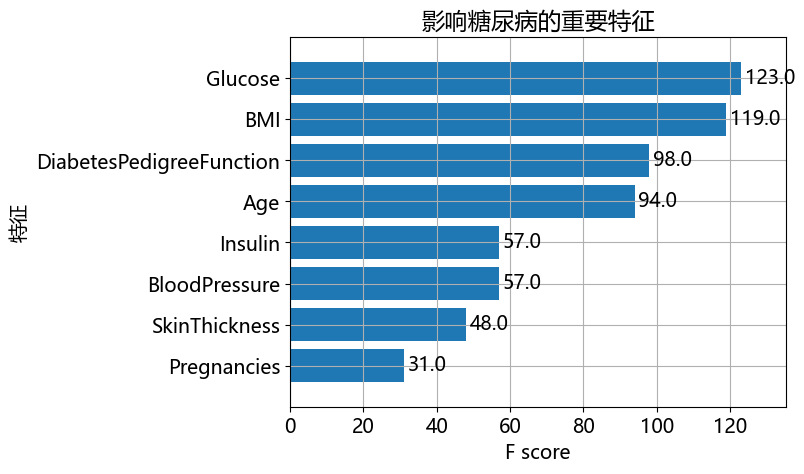

In [73]:
ypred = bst.predict(dtest)
print("测试集每个样本的得分\n",ypred)
ypred_leaf = bst.predict(dtest, pred_leaf=True)
print("测试集每棵树所属的节点数\n",ypred_leaf)
ypred_contribs = bst.predict(dtest, pred_contribs=True)
print("特征的重要性\n",ypred_contribs )

xgb.plot_importance(bst,height=0.8,title='影响糖尿病的重要特征', ylabel='特征')
plt.rc('font', family='Arial Unicode MS', size=14)
plt.show()